<b>

<p>
<center>
<font size="5">
Intro to Data Minning (DATS 6103), Spring 2020
</font>
</center>
</p>

<p>
<center>
<font size="4">
Project Baltimore
</font>
</center>
</p>

<p>
<center>
<font size="3">
Present by:
Pauline Mckim ,
Malikat Coulibaly ,
Spencer Stucky ,
junhe zhang
</font>
</center>
</p>

<p>
<center>
<font size="3">
Due: May 2nd
</font>
</center>
</p>

</b>

# Overview
- write me:
- write me:
- **write me**
- write me

# Notebook Configuration

## Google Drive

In [671]:
# skip this if know usin google colab
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Implement me
# Set working directory
abspath = '/content/drive/My Drive/Colab Notebooks/dats6103_project/'

ModuleNotFoundError: No module named 'google'

## Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [672]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## Create dictionary for 15 crime types

In [673]:
# 15 most common charges for Arrest: code & desc 
crimes = {'11415':'assualt 2nd degree',
        '43550':'possess not marihuana',
        '10077':'Failure to appear',
        '11635': 'poss Marijuana',
        '30233': 'Cds:P W/I Dist:Narc',
        '10573': 'Cds: Possession-Marihuana',
        '10088': 'Violation of probation',
        '11420':  'Asslt-First Degree',
        '2A0696': 'Att-Cds Manuf/Dist-Narc',
        '10521': 'Theft Less Than $100.00',
        '10621': 'Theft: Less $1,000 Value',
        '11093': 'General Prostitution',
        '20050': 'Dis.Erly Conduct',
        '20696': 'Cds Manuf/Dist-Narc',
        '20705': 'Armed Robbery'
         }
print(crimes)

{'11415': 'assualt 2nd degree', '43550': 'possess not marihuana', '10077': 'Failure to appear', '11635': 'poss Marijuana', '30233': 'Cds:P W/I Dist:Narc', '10573': 'Cds: Possession-Marihuana', '10088': 'Violation of probation', '11420': 'Asslt-First Degree', '2A0696': 'Att-Cds Manuf/Dist-Narc', '10521': 'Theft Less Than $100.00', '10621': 'Theft: Less $1,000 Value', '11093': 'General Prostitution', '20050': 'Dis.Erly Conduct', '20696': 'Cds Manuf/Dist-Narc', '20705': 'Armed Robbery'}


# Data Preprocessing

## Loading data

In [674]:
import pandas as pd

# Load the cleaned raw data
# df_balti = pd.read_csv(abspath + 'data/balti_clean_weather.csv', header=0)
df_balti = pd.read_csv('../data/balti_clean_weather.csv', header=0)
df_balti = df_balti.copy(deep=True)
print(df_balti.shape)
df_balti.head()

(100765, 24)


,Arrest,Age,Sex,Race,ArrestDate,ArrestTime,ArrestLocation,IncidentLocation,Charge,District,...,Location 1,Season,Daynight,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,PrecipitationIn,Unnamed: 5,Unnamed: 6,ChargeDescriptionClean
0,17174890.0,21.0,F,W,11/4/17,23:50,NaN,NaN,10077,NaN,...,NaN,Fall,Night,56,52.2,47,0.00,NaN,NaN,Failure to appear
1,17174874.0,26.0,M,B,11/4/17,23:39,5700 HAZELWOOD CIR,5700 HAZELWOOD CIR,11415,Northeastern,...,"(39.3391387384981, -76.5317819993018)",Fall,Night,56,52.2,47,0.00,NaN,NaN,assualt 2nd degree 1
2,17174889.0,23.0,F,B,11/4/17,23:30,NaN,NaN,10077,NaN,...,NaN,Fall,Night,56,52.2,47,0.00,NaN,NaN,Failure to appear
3,17174864.0,33.0,M,B,11/4/17,23:15,NaN,2700 ASHLAND AVE,10077,NaN,...,NaN,Fall,Night,56,52.2,47,0.00,NaN,NaN,Failure to appear
4,17174860.0,33.0,M,B,11/4/17,23:15,NaN,5700 EASTERN AVE,10077,NaN,...,NaN,Fall,Night,56,52.2,47,0.00,NaN,NaN,Failure to appear


## Getting the name of the target

In [675]:
# info and set target
df_balti.info()
target = 'Charge'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100765 entries, 0 to 100764
Data columns (total 24 columns):
Arrest                    100762 non-null float64
Age                       100752 non-null float64
Sex                       100765 non-null object
Race                      100765 non-null object
ArrestDate                100765 non-null object
ArrestTime                100765 non-null object
ArrestLocation            60194 non-null object
IncidentLocation          63902 non-null object
Charge                    100765 non-null object
District                  60184 non-null object
Post                      60171 non-null float64
Neighborhood              60182 non-null object
Longitude                 60234 non-null float64
Latitude                  60234 non-null float64
Location 1                60234 non-null object
Season                    100765 non-null object
Daynight                  100765 non-null object
Max.TemperatureF          100765 non-null object
Mean.Tempe

## Remove and store unused variables

In [676]:
useless = ['Race','ArrestLocation','IncidentLocation','Neighborhood','Unnamed: 5','Unnamed: 6']
chargeDescription = df_balti['ChargeDescriptionClean'].unique()
neighborhood = df_balti['Neighborhood'].unique()
df_balti = df_balti.drop(columns=useless)
print(chargeDescription)
#print(neighborhood)
df_balti.head()

['Failure to appear' 'assualt 2nd degree 1' 'Cds: Possession-Marihuana'
 'Asslt-First Degree' 'Violation of probation' 'Theft Less Than $100.00'
 'Armed Robbery' 'General Prostitution' 'possess not marihuana'
 'Theft: Less $1,000 Value' 'Dis.Erly Conduct' 'Cds:P W/I Dist:Narc'
 'Cds Manuf/Dist-Narc' 'Att-Cds Manuf/Dist-Narc' 'poss Marijuana']


,Arrest,Age,Sex,ArrestDate,ArrestTime,Charge,District,Post,Longitude,Latitude,Location 1,Season,Daynight,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,PrecipitationIn,ChargeDescriptionClean
0,17174890.0,21.0,F,11/4/17,23:50,10077,NaN,NaN,NaN,NaN,NaN,Fall,Night,56,52.2,47,0.00,Failure to appear
1,17174874.0,26.0,M,11/4/17,23:39,11415,Northeastern,444.0,-76.531782,39.339139,"(39.3391387384981, -76.5317819993018)",Fall,Night,56,52.2,47,0.00,assualt 2nd degree 1
2,17174889.0,23.0,F,11/4/17,23:30,10077,NaN,NaN,NaN,NaN,NaN,Fall,Night,56,52.2,47,0.00,Failure to appear
3,17174864.0,33.0,M,11/4/17,23:15,10077,NaN,NaN,NaN,NaN,NaN,Fall,Night,56,52.2,47,0.00,Failure to appear
4,17174860.0,33.0,M,11/4/17,23:15,10077,NaN,NaN,NaN,NaN,NaN,Fall,Night,56,52.2,47,0.00,Failure to appear


## Filtering Top 5 crime types


In [677]:
df_balti['ChargeDescriptionClean'].value_counts()

assualt 2nd degree 1         23003
possess not marihuana        21403
Failure to appear            19754
poss Marijuana                5256
Cds:P W/I Dist:Narc           4919
Cds: Possession-Marihuana     4761
Violation of probation        3915
Asslt-First Degree            3024
Att-Cds Manuf/Dist-Narc       2895
Theft Less Than $100.00       2509
Theft: Less $1,000 Value      2384
General Prostitution          1824
Dis.Erly Conduct              1797
Cds Manuf/Dist-Narc           1676
Armed Robbery                 1645
Name: ChargeDescriptionClean, dtype: int64

In [678]:
crime5 = ['assualt 2nd degree 1','possess not marihuana','Failure to appear','poss Marijuana','Cds:P W/I Dist:Narc']
df_baltiTop5 = df_balti.loc[df_balti['ChargeDescriptionClean'].isin(crime5)]
df_baltiTop5['ChargeDescriptionClean'].value_counts()

assualt 2nd degree 1     23003
possess not marihuana    21403
Failure to appear        19754
poss Marijuana            5256
Cds:P W/I Dist:Narc       4919
Name: ChargeDescriptionClean, dtype: int64

## Dividing the balti data into training and testing

In [679]:

from sklearn.model_selection import train_test_split

# set seed to 42, so that the result is reproduceable
seed = 42
# Divide the balti data into training (90%) and testing (10%)
df_train, df_test = train_test_split(df_balti, train_size=0.9, random_state=seed, stratify=df_balti[target])

# Reset the index
df_train, df_test = df_train.reset_index(drop=True), df_test.reset_index(drop=True)

print(df_train.shape)
print(df_test.shape)
print(df_balti.shape)
df_train.head()
df_test.head()

(90688, 18)
(10077, 18)
(100765, 18)


,Arrest,Age,Sex,ArrestDate,ArrestTime,Charge,District,Post,Longitude,Latitude,Location 1,Season,Daynight,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,PrecipitationIn,ChargeDescriptionClean
0,13718446.0,20.0,F,7/20/13,15:00,30233,Southern,912.0,-76.611012,39.235427,"(39.2354266707000, -76.6110121835000)",Summer,Day,93,84,74,0,Cds:P W/I Dist:Narc
1,13671273.0,53.0,M,4/23/13,9:05,43550,Northwestern,633.0,-76.672573,39.350832,"(39.3508322866000, -76.6725732075000)",Spring,Day,62,54,46,0,possess not marihuana
2,14017441.0,42.0,F,2/4/14,6:30,10077,NaN,NaN,NaN,NaN,NaN,Winter,Night,35,30,25,0.03,Failure to appear
3,14022470.0,26.0,M,2/11/14,22:00,30233,Southwestern,832.0,-76.666634,39.261553,"(39.2615531016000, -76.6666336321000)",Winter,Night,30,22,14,0,Cds:P W/I Dist:Narc
4,17010587.0,26.0,F,1/21/17,23:15,11415,Southwestern,811.0,-76.665885,39.310311,"(39.3103108521708, -76.6658847488879)",Winter,Night,48,46.0,44,0.02,assualt 2nd degree 1


## Dividing the training data into training and validating

In [680]:
# set seed to 42, so that the result is reproduceable
seed = 42
# Divide the df_train data into training (80%) and testing (20%)
df_train, df_valid = train_test_split(df_train, train_size=0.8, random_state=seed, stratify=df_train[target])

# Reset the index
df_train, df_valid = df_train.reset_index(drop=True), df_valid.reset_index(drop=True)
df_train.head()
df_valid.head()

,Arrest,Age,Sex,ArrestDate,ArrestTime,Charge,District,Post,Longitude,Latitude,Location 1,Season,Daynight,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,PrecipitationIn,ChargeDescriptionClean
0,13703767.0,27.0,M,6/22/13,13:00,11635,Eastern,334.0,-76.580779,39.298934,"(39.2989340467000, -76.5807790560000)",Summer,Day,86,74,61,0,poss Marijuana
1,17154602.0,52.0,M,9/30/17,22:00,43550,Southeastern,221.0,-76.584947,39.297654,"(39.2976544332212, -76.5849470377654)",Fall,Night,65,59.6,54,0.00,possess not marihuana
2,14065171.0,18.0,M,4/23/14,23:40,10077,NaN,NaN,NaN,NaN,NaN,Spring,Night,60,51,41,0,Failure to appear
3,14097983.0,21.0,F,6/16/14,10:00,20050,Eastern,312.0,-76.599223,39.311962,"(39.3119617603000, -76.5992228788000)",Spring,Day,90,75,59,0,Dis.Erly Conduct
4,14170148.0,26.0,F,10/7/14,16:30,11093,Northeastern,424.0,-76.551041,39.364399,"(39.3643990337000, -76.5510410364000)",Fall,Day,69,64,58,0.54,General Prostitution


In [681]:
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)
print(df_balti.shape)

(72550, 18)
(18138, 18)
(10077, 18)
(100765, 18)


## Handling the identifiers

In [682]:
# find identifers in df
def id_checker(df):
    """
    The identifier checker

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The dataframe of identifiers
    """
    
    # Get the identifiers
    df_id = df[[var for var in df.columns 
                if df[var].nunique(dropna=True) == df[var].notnull().sum()]]
                
    return df_id

## drop identifers

In [683]:
# combine train test
df = pd.concat([df_train, df_valid, df_test], sort=False)

import numpy as np

df_id = id_checker(df)

df_id.head()

# remove id Arrest
df_train = df_train.drop(columns=np.intersect1d(df_train.columns, 'Arrest'))

df_test = df_test.drop(columns=np.intersect1d(df_test.columns, 'Arrest'))

df_valid = df_valid.drop(columns=np.intersect1d(df_valid.columns, 'Arrest'))

df = pd.concat([df_train, df_valid, df_test], sort=False)

print(df.columns)
print(df.shape)

Index(['Age', 'Sex', 'ArrestDate', 'ArrestTime', 'Charge', 'District', 'Post',
       'Longitude', 'Latitude', 'Location 1', 'Season', 'Daynight',
       'Max.TemperatureF', 'Mean.TemperatureF', 'Min.TemperatureF',
       'PrecipitationIn', 'ChargeDescriptionClean'],
      dtype='object')
(100765, 17)


## Handling date time variables

In [684]:
# handle datetime columns
def datetime_transformer(df, datetime_vars):
    """
    The datetime transformer

    Parameters
    ----------
    df : dataframe
    datetime_vars : the datetime variables
    
    Returns
    ----------
    The dataframe where datetime_vars are transformed into the following 6 datetime types:
    year, month, day, hour, minute and second
    """
    
    # The dictionary with key as datetime type and value as datetime type operator
    dict_ = {'year'   : lambda x : x.dt.year,
             'month'  : lambda x : x.dt.month,
             'day'    : lambda x : x.dt.day,
             'hour'   : lambda x : x.dt.hour,
             'minute' : lambda x : x.dt.minute,
             'second' : lambda x : x.dt.second}
    
    # Make a copy of df
    df_datetime = df.copy(deep=True)
    
    # For each variable in datetime_vars
    for var in datetime_vars:
        # Cast the variable to datetime
        df_datetime[var] = pd.to_datetime(df_datetime[var])
        
        # For each item (datetime_type and datetime_type_operator) in dict_
        for datetime_type, datetime_type_operator in dict_.items():
            # Add a new variable to df_datetime where:
            # the variable's name is var + '_' + datetime_type
            # the variable's values are the ones obtained by datetime_type_operator
            df_datetime[var + '_' + datetime_type] = datetime_type_operator(df_datetime[var])
            
    # Remove datetime_vars from df_datetime
    df_datetime = df_datetime.drop(columns=datetime_vars)
                
    return df_datetime




## encode datetime variables

In [685]:
# import datetime
from datetime import datetime

# clean time columns
def cleanTime(df):
  time = 'ArrestTime'
  if '.' in df[time]:
    return df[time].replace('.',':')
  if '.' not in df[time] and ':' not in df[time]:
    df[time] = df[time] + ':00'
  return df[time]

df['ArrestTime'] = df.apply(cleanTime, axis=1)
df['time'] = df['ArrestDate'] + " " +  df['ArrestTime']
df['datetime'] = df['time'].apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))

df = datetime_transformer(df, ['datetime'])


## Drop the encoded date time column

In [686]:
# drop encode date and time columns and duplicated location 1
# drop ChargeDescriptionClean because it has 100% possitive correlation with charge which is our target
df = df.drop(columns=['ArrestDate','ArrestTime','time','datetime_second','ChargeDescriptionClean','Location 1'])

# Separating the training data
df_train = df.iloc[:df_train.shape[0], :].copy(deep=True)

# Separating the validation data
df_valid = df.iloc[df_train.shape[0]:df_train.shape[0] + df_valid.shape[0], :].copy(deep=True)

# Separating the testing data
df_test = df.iloc[df_train.shape[0] + df_valid.shape[0]:, :].copy(deep=True)

df_test.head()

df.head()

,Age,Sex,Charge,District,Post,Longitude,Latitude,Season,Daynight,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,PrecipitationIn,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute
0,34.0,M,11415,NaN,NaN,NaN,NaN,Fall,Day,60,51,42,0,2014,10,30,11,0
1,22.0,M,43550,Western,732.0,-76.648292,39.309859,Spring,Night,51,40.9,33,0.00,2016,3,21,23,8
2,37.0,M,11420,NaN,NaN,NaN,NaN,Summer,Day,75,67,58,0.03,2013,9,16,9,0
3,26.0,M,20696,NaN,NaN,NaN,NaN,Winter,Day,45,34.7,26,0.00,2017,2,14,17,30
4,52.0,M,43550,Southeastern,234.0,-76.540519,39.276046,Winter,Day,49,36,22,0,2013,12,27,11,0


## Handling missing data
### define nan_checker helper function

In [687]:


def nan_checker(df):
    """
    The NaN checker

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The dataframe of variables with NaN, their proportion of NaN and dtype
    """
    
    # Get the variables with NaN, their proportion of NaN and dtype
    df_nan = pd.DataFrame([[var, df[var].isna().sum() / df.shape[0], df[var].dtype]
                           for var in df.columns if df[var].isna().sum() > 0],
                          columns=['var', 'proportion', 'dtype'])
    
    # Sort df_nan in accending order of the proportion of NaN
    df_nan = df_nan.sort_values(by='proportion', ascending=False)
    
    return df_nan


# do not remove target variable

### clean missing variable

In [688]:
# Combine df_train, df_valid and df_test
df = pd.concat([df_train, df_valid, df_test], sort=False)
df.head()

# Call nan_checker on df
df_nan = nan_checker(df)

# Print df_nan
df_nan.reset_index(drop=True)

# Get the variables with missing values, their proportion of missing values and dtype
df_miss = df_nan[df_nan['dtype'] == 'float64']

# Print df_miss
print(df_miss.reset_index(drop=True).head())
print(df_nan)


         var  proportion    dtype
0       Post    0.402858  float64
1  Longitude    0.402233  float64
2   Latitude    0.402233  float64
3        Age    0.000129  float64
         var  proportion    dtype
2       Post    0.402858  float64
1   District    0.402729   object
3  Longitude    0.402233  float64
4   Latitude    0.402233  float64
0        Age    0.000129  float64


### first approach remove missing data

In [689]:
# Remove rows with missing values from df_train
df_train = df_train.dropna(subset=np.intersect1d(df_miss['var'], df_train.columns),
                           inplace=False)

# Remove rows with missing values from df_valid
df_valid = df_valid.dropna(subset=np.intersect1d(df_miss['var'], df_valid.columns),
                           inplace=False)

# Remove rows with missing values from df_test
df_test = df_test.dropna(subset=np.intersect1d(df_miss['var'], df_test.columns),
                         inplace=False)

# Combine df_train, df_valid and df_test
df = pd.concat([df_train, df_valid, df_test], sort=False)
print(nan_checker(df))
print(df.shape)
df.head()

Empty DataFrame
Columns: [var, proportion, dtype]
Index: []
(60165, 18)


,Age,Sex,Charge,District,Post,Longitude,Latitude,Season,Daynight,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,PrecipitationIn,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute
1,22.0,M,43550,Western,732.0,-76.648292,39.309859,Spring,Night,51,40.9,33,0.00,2016,3,21,23,8
4,52.0,M,43550,Southeastern,234.0,-76.540519,39.276046,Winter,Day,49,36,22,0,2013,12,27,11,0
6,23.0,M,11415,Northern,526.0,-76.610964,39.329273,Winter,Night,51,41,31,0,2013,3,20,19,40
7,19.0,M,11635,Southern,913.0,-76.600611,39.230925,Summer,Night,78,66,54,0,2014,8,15,21,30
8,27.0,M,43550,Southeastern,233.0,-76.547397,39.278772,Summer,Day,89,80,70,0,2015,7,7,14,15


In [690]:
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)
print(df.shape)

(43349, 18)
(10789, 18)
(6027, 18)
(60165, 18)


## Encoding the data

In [691]:
# find categorical variables
def cat_var_checker(df):
    """
    The categorical variable checker

    Parameters
    ----------
    df: the dataframe
    
    Returns
    ----------
    The dataframe of categorical variables and their number of unique value
    """
    
    # Get the dataframe of categorical variables and their number of unique value
    df_cat = pd.DataFrame([[var, df[var].nunique(dropna=False)]
                           for var in df.columns if df[var].dtype == 'object'],
                          columns=['var', 'nunique'])
    
    # Sort df_cat in accending order of the number of unique value
    df_cat = df_cat.sort_values(by='nunique', ascending=False)
    
    return df_cat

### Handle categorical variables

In [692]:
# count number of different categories in each categorical variable

print('number of unique category:\
\nDistrict : {} \
\nPrecipitationIn: {}'.format(df['District'].nunique(),df['PrecipitationIn'].nunique()))

number of unique category:
District : 9 
PrecipitationIn: 215


## Find categorical features

In [693]:
# Call cat_var_checker on df
df_cat = cat_var_checker(df)
# Print the dataframe
df_cat.reset_index(drop=True)

,var,nunique
0,Mean.TemperatureF,497
1,PrecipitationIn,215
2,Max.TemperatureF,184
3,Min.TemperatureF,178
4,Charge,15
5,District,9
6,Season,4
7,Sex,2
8,Daynight,2


## Convert temperature and precipitation to numeric values

In [694]:
# convert temperatures and precipitation to float
df['Max.TemperatureF'] = df['Max.TemperatureF'].apply(lambda x: float(str(x).replace('\xa0','')))
df['Mean.TemperatureF'] = df['Mean.TemperatureF'].apply(lambda x: float(str(x).replace('\xa0','')))
df['Min.TemperatureF'] = df['Min.TemperatureF'].apply(lambda x: float(str(x).replace('\xa0','')))
df['PrecipitationIn'] = df['PrecipitationIn'].apply(lambda x: float(str(x).replace('\xa0','')))
df.tail()

,Age,Sex,Charge,District,Post,Longitude,Latitude,Season,Daynight,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,PrecipitationIn,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute
10071,51.0,F,43550,Southern,911.0,-76.590517,39.231192,Spring,Night,68.0,58.0,47.0,0.0,2013,5,1,18,0
10073,70.0,M,43550,Northwestern,622.0,-76.689840,39.322704,Winter,Night,32.0,19.0,6.0,0.0,2014,1,4,20,0
10074,52.0,M,11415,Northern,516.0,-76.617028,39.312180,Spring,Day,48.0,38.0,28.0,0.0,2013,4,2,7,45
10075,29.0,M,43550,Southern,911.0,-76.594894,39.229789,Fall,Day,80.0,66.0,52.0,0.0,2015,9,24,14,45
10076,34.0,M,11415,Central,111.0,-76.609632,39.289780,Spring,Night,68.0,53.0,38.0,0.0,2013,4,7,2,30


In [695]:
df['District'].unique()

array(['Western', 'Southeastern', 'Northern', 'Southern', 'Northeastern',
       'Northwestern', 'Southwestern', 'Eastern', 'Central'], dtype=object)

In [696]:
# make a deep copy of df
future_fake_df = df.copy()
summer_southeast_df = future_fake_df.loc[(future_fake_df['District']=='Southeastern') & (future_fake_df['Season']=='Summer'),]
summer_southeast_sorted_df = summer_southeast_df.sort_values(by=['datetime_hour','datetime_minute'])
summer_southeast_sorted_df.head()
summer_southeast_sorted_df['datetime_year'] = 2020
summer_southeast_sorted_df['datetime_month'] = 5
summer_southeast_sorted_df['datetime_day'] = 3
# add 8 different district and 3 seasons
row1 = future_fake_df.loc[(future_fake_df['District']=='Western') & (future_fake_df['Season']=='Winter'),].iloc[[1]]
row2 = future_fake_df.loc[(future_fake_df['District']=='Northern') & (future_fake_df['Season']=='Fall'),].iloc[[1]]
row3 = future_fake_df.loc[(future_fake_df['District']=='Southern') & (future_fake_df['Season']=='Spring'),].iloc[[1]]
row4 = future_fake_df.loc[(future_fake_df['District']=='Northeastern') & (future_fake_df['Season']=='Summer'),].iloc[[1]]
row5 = future_fake_df.loc[(future_fake_df['District']=='Northwestern') & (future_fake_df['Season']=='Summer'),].iloc[[1]]
row6 = future_fake_df.loc[(future_fake_df['District']=='Southwestern') & (future_fake_df['Season']=='Summer'),].iloc[[1]]
row7 = future_fake_df.loc[(future_fake_df['District']=='Eastern') & (future_fake_df['Season']=='Summer'),].iloc[[1]]
row8 = future_fake_df.loc[(future_fake_df['District']=='Central') & (future_fake_df['Season']=='Summer'),].iloc[[1]]
summer_southeast_sorted_df = pd.concat([summer_southeast_sorted_df,row1,row2,row3,row4,row5,row6,row7,row8], ignore_index=True)
print(summer_southeast_sorted_df.shape)
# make a copy of summer_southeast_sorted_df
summer_southeast_sorted_df_cp = summer_southeast_sorted_df.copy()
summer_southeast_sorted_df.tail()

(2063, 18)


,Age,Sex,Charge,District,Post,Longitude,Latitude,Season,Daynight,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,PrecipitationIn,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute
2058,18.0,M,10573,Northeastern,423.0,-76.583762,39.358308,Summer,Night,82.0,73.0,63.0,0.00,2014,8,13,20,0
2059,19.0,F,11415,Northwestern,612.0,-76.665973,39.339866,Summer,Day,98.0,86.6,77.0,0.00,2016,7,25,13,45
2060,19.0,F,11415,Southwestern,835.0,-76.657595,39.279952,Summer,Night,90.0,79.1,66.0,0.32,2016,7,17,21,34
2061,34.0,M,11635,Eastern,324.0,-76.597192,39.295196,Summer,Night,87.0,78.0,68.0,0.00,2013,6,29,20,1
2062,30.0,M,20050,Central,131.0,-76.635679,39.304277,Summer,Night,81.0,71.0,61.0,0.00,2014,7,17,21,35


## Check the categorical result after covert

In [697]:
# Call cat_var_checker on df
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat.reset_index(drop=True)

,var,nunique
0,Charge,15
1,District,9
2,Season,4
3,Sex,2
4,Daynight,2


## Encode categorical features

In [698]:
# handle feature categories

# One-hot-encode the categorical features in the combined training and testing data
# use get_dummies on categorical variables with small number of unique levels
df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'], [target]))

# handle target and 'ArrestLocation','IncidentLocation','Neighborhood '
# use labelEncoder for large categorical variables
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode the categorical ArrestLocation in the combined data
# df['ArrestLocation'] = le.fit_transform(df['ArrestLocation'].astype(str))

# Encode the categorical IncidentLocation in the combined data
# df['IncidentLocation'] = le.fit_transform(df['IncidentLocation'].astype(str))

# Encode the categorical Neighborhood in the combined data
# df['Neighborhood'] = le.fit_transform(df['Neighborhood'].astype(str))

# Encode the categorical target in the combined data
df[target] = le.fit_transform(df[target].astype(str))

# Print the first 5 rows of df
df.head()

,Age,Charge,Post,Longitude,Latitude,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,PrecipitationIn,datetime_year,...,District_Southeastern,District_Southern,District_Southwestern,District_Western,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Sex_F,Sex_M
1,22.0,14,732.0,-76.648292,39.309859,51.0,40.9,33.0,0.0,2016,...,0,0,0,1,0,1,0,0,0,1
4,52.0,14,234.0,-76.540519,39.276046,49.0,36.0,22.0,0.0,2013,...,1,0,0,0,0,0,0,1,0,1
6,23.0,6,526.0,-76.610964,39.329273,51.0,41.0,31.0,0.0,2013,...,0,0,0,0,0,0,0,1,0,1
7,19.0,8,913.0,-76.600611,39.230925,78.0,66.0,54.0,0.0,2014,...,0,1,0,0,0,0,1,0,0,1
8,27.0,14,233.0,-76.547397,39.278772,89.0,80.0,70.0,0.0,2015,...,1,0,0,0,0,0,1,0,0,1


In [699]:
# use get_dummies on categorical variables with small number of unique levels
summer_southeast_sorted_df = pd.get_dummies(summer_southeast_sorted_df, columns=np.setdiff1d(df_cat['var'], [target]))
# Encode the categorical target in the summer_southeast_sorted_df
# summer_southeast_sorted_df[target] = le.fit_transform(summer_southeast_sorted_df[target].astype(str))
summer_southeast_sorted_charge = summer_southeast_sorted_df['Charge']
summer_southeast_sorted_df = summer_southeast_sorted_df.drop(columns = 'Charge')
summer_southeast_sorted_df.head()

,Age,Post,Longitude,Latitude,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,PrecipitationIn,datetime_year,datetime_month,...,District_Southeastern,District_Southern,District_Southwestern,District_Western,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Sex_F,Sex_M
0,43.0,223.0,-76.567795,39.295823,76.0,65.0,53.0,0.00,2020,5,...,1,0,0,0,0,0,1,0,0,1
1,17.0,224.0,-76.566194,39.288640,74.0,63.0,51.0,0.00,2020,5,...,1,0,0,0,0,0,1,0,0,1
2,28.0,212.0,-76.595865,39.293611,71.0,58.0,44.0,0.00,2020,5,...,1,0,0,0,0,0,1,0,0,1
3,25.0,224.0,-76.565523,39.291503,83.0,75.0,66.0,0.04,2020,5,...,1,0,0,0,0,0,1,0,0,1
4,35.0,233.0,-76.548190,39.281219,86.0,71.0,55.0,0.00,2020,5,...,1,0,0,0,0,0,1,0,0,1


## Getting the name of the features

In [700]:

# Separating the training data
df_train = df.iloc[:df_train.shape[0], :].copy(deep=True)

# Separating the validation data
df_valid = df.iloc[df_train.shape[0]:df_train.shape[0] + df_valid.shape[0], :].copy(deep=True)

# Separating the testing data
df_test = df.iloc[df_train.shape[0] + df_valid.shape[0]:, :].copy(deep=True)

df_test.head()
features = np.setdiff1d(df.columns, [target])
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)
print(df.shape)
print(features)

(43349, 31)
(10789, 31)
(6027, 31)
(60165, 31)
['Age' 'Daynight_Day' 'Daynight_Night' 'District_Central'
 'District_Eastern' 'District_Northeastern' 'District_Northern'
 'District_Northwestern' 'District_Southeastern' 'District_Southern'
 'District_Southwestern' 'District_Western' 'Latitude' 'Longitude'
 'Max.TemperatureF' 'Mean.TemperatureF' 'Min.TemperatureF' 'Post'
 'PrecipitationIn' 'Season_Fall' 'Season_Spring' 'Season_Summer'
 'Season_Winter' 'Sex_F' 'Sex_M' 'datetime_day' 'datetime_hour'
 'datetime_minute' 'datetime_month' 'datetime_year']


## check train dataset

In [701]:
print(df_train.shape)
df_train.head()

(43349, 31)


,Age,Charge,Post,Longitude,Latitude,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,PrecipitationIn,datetime_year,...,District_Southeastern,District_Southern,District_Southwestern,District_Western,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Sex_F,Sex_M
1,22.0,14,732.0,-76.648292,39.309859,51.0,40.9,33.0,0.0,2016,...,0,0,0,1,0,1,0,0,0,1
4,52.0,14,234.0,-76.540519,39.276046,49.0,36.0,22.0,0.0,2013,...,1,0,0,0,0,0,0,1,0,1
6,23.0,6,526.0,-76.610964,39.329273,51.0,41.0,31.0,0.0,2013,...,0,0,0,0,0,0,0,1,0,1
7,19.0,8,913.0,-76.600611,39.230925,78.0,66.0,54.0,0.0,2014,...,0,1,0,0,0,0,1,0,0,1
8,27.0,14,233.0,-76.547397,39.278772,89.0,80.0,70.0,0.0,2015,...,1,0,0,0,0,0,1,0,0,1


## check valid dataset

In [702]:
print(df_valid.shape)
df_valid.head()

(10789, 31)


,Age,Charge,Post,Longitude,Latitude,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,PrecipitationIn,datetime_year,...,District_Southeastern,District_Southern,District_Southwestern,District_Western,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Sex_F,Sex_M
0,27.0,8,334.0,-76.580779,39.298934,86.0,74.0,61.0,0.00,2013,...,0,0,0,0,0,0,1,0,0,1
1,52.0,14,221.0,-76.584947,39.297654,65.0,59.6,54.0,0.00,2017,...,1,0,0,0,1,0,0,0,0,1
3,21.0,9,312.0,-76.599223,39.311962,90.0,75.0,59.0,0.00,2014,...,0,0,0,0,0,1,0,0,1,0
4,26.0,5,424.0,-76.551041,39.364399,69.0,64.0,58.0,0.54,2014,...,0,0,0,0,1,0,0,0,1,0
5,18.0,8,411.0,-76.596706,39.320787,74.0,66.0,57.0,0.04,2013,...,0,0,0,0,0,1,0,0,0,1


## check test dataset

In [703]:
print(df_test.shape)
df_test.head()

(6027, 31)


,Age,Charge,Post,Longitude,Latitude,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,PrecipitationIn,datetime_year,...,District_Southeastern,District_Southern,District_Southwestern,District_Western,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Sex_F,Sex_M
0,20.0,13,912.0,-76.611012,39.235427,93.0,84.0,74.0,0.00,2013,...,0,1,0,0,0,0,1,0,1,0
1,53.0,14,633.0,-76.672573,39.350832,62.0,54.0,46.0,0.00,2013,...,0,0,0,0,0,1,0,0,0,1
3,26.0,13,832.0,-76.666634,39.261553,30.0,22.0,14.0,0.00,2014,...,0,0,1,0,0,0,0,1,0,1
4,26.0,6,811.0,-76.665885,39.310311,48.0,46.0,44.0,0.02,2017,...,0,0,1,0,0,0,0,1,1,0
5,38.0,8,121.0,-76.621865,39.292950,89.0,76.0,63.0,0.00,2014,...,0,0,0,0,0,0,1,0,0,1


## Getting the feature matrix and target vector

In [704]:
# convert to numpy data types
# Get the feature matrix
X_train = df_train[features].to_numpy()
X_valid = df_valid[features].to_numpy()
X_test = df_test[features].to_numpy()

# Get the target vector
y_train = df_train[target].astype(int).to_numpy()
y_valid = df_valid[target].astype(int).to_numpy()


In [705]:

X_summer_southeast_sorted_df = summer_southeast_sorted_df.to_numpy()

## Scaling the data

In [706]:
# Scale data for better prediction
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_valid = ss.transform(X_valid)

# Standardize the testing data
X_test = ss.transform(X_test)

In [707]:
X_summer_southeast_sorted_df = ss.fit_transform(X_summer_southeast_sorted_df)

# Hyperparameter Tuning and Model Selection

## Creating the dictionary of the models
- In the dictionary:
    - the key is the acronym of the model
    - the value is the model

In [256]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=42),
          'dtc': DecisionTreeClassifier(class_weight='balanced', random_state=42),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=42),
          'knn': KNeighborsClassifier(weights='uniform', algorithm='auto', metric='minkowski'),
          'hgbc': HistGradientBoostingClassifier(random_state=42),
          'mlpc': MLPClassifier(early_stopping=True, random_state=42),
          'xgbc': XGBClassifier(seed=42)}
# The MLPClassifier
# models = {'rfc': RandomForestClassifier(class_weight='balanced', random_state=42),
#           'mlpc': MLPClassifier(early_stopping=True, random_state=42)}

## Creating the dictionary of the pipelines
In the dictionary:
- the key is the acronym of the model
- the value is the pipeline, which, for now, only includes the model

In [257]:
# build pipeline for each model
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

## Hyperparameter tuning and  model selection using Sklearn (0.22 or above)

### Getting the predefined split cross-validator

In [258]:

from sklearn.model_selection import PredefinedSplit
import numpy as np

# Combine the feature matrix in the training and validation data
X_train_valid = np.vstack((X_train, X_valid))

# Combine the target vector in the training and validation data
y_train_valid = np.append(y_train, y_valid)

# Get the indices of training and validation data
train_valid_idxs = np.append(np.full(X_train.shape[0], -1), np.full(X_valid.shape[0], 0))

# The PredefinedSplit
ps = PredefinedSplit(train_valid_idxs)
print(ps)

PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0]))


### Creating the dictionary of the parameter grids
- In the dictionary:
    - the key is the acronym of the model
    - the value is the parameter grid of the model

In [259]:
# instantiate parameter grids
param_grids = {}


#### The parameter grid for logistic regression
The hyperparameters we want to fine-tune are:
- C
- tol

See details of the meaning of the hyperparametes in sklearn.linear_model.LogisticRegression

In [260]:

# The grids for C
C_grids = [10 ** i for i in range(-2, 3)]

# The grids for tol
tol_grids = [10 ** i for i in range(-6, -1)]

# Update param_grids
param_grids['lr'] = [{'model__C': C_grids,
                      'model__tol': tol_grids}]

#### The parameter grid for decision tree
The hyperparameters we want to fine-tune are:
- min_samples_split
- min_samples_leaf

See details of the meaning of the hyperparametes in sklearn.tree.DecisionTreeClassifier

In [261]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['dtc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [262]:
# The grids for n_neighbors
n_neighbors_grids = [i for i in range(3, 21, 2)]
# The grids for leaf_size
leaf_size_grids = [20,30,50,80]
# The grids for p
p_grids = [1,2]
# Update param_grids
param_grids['knn'] = [{'model__n_neighbors': n_neighbors_grids,
                       'model__leaf_size': leaf_size_grids,
                       'model__p': p_grids
                      }]

#### The parameter grid for Adaboost
The hyperparameters we want to fine-tune are:
- learning_rate

See details of the meaning of the hyperparametes in sklearn.ensemble.AdaBoostClassifier

In [263]:
# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-3, 2)]

# Update param_grids
param_grids['abc'] = [{'model__learning_rate': learning_rate_grids}]

#### The parameter grid for HistGradientBoosting
The hyperparameters we want to fine-tune are:
- learning_rate
- min_samples_leaf

See details of the meaning of the hyperparametes in sklearn.ensemble.HistGradientBoostingClassifier

In [264]:
# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-3, 2)]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

#### The parameter grid for XGBoost
The hyperparameters we want to fine-tune are:
- eta
- gamma
- lambda

See details of the meaning of the hyperparametes in XGBoost Parameters

In [265]:
# The grids for eta
eta_grids = [10 ** i for i in range(-4, 1)]

# The grids for gamma
gamma_grids = [0, 10, 100]

# The grids for lambda
lambda_grids = [10 ** i for i in range(-4, 5)]

# Update param_grids
param_grids['xgbc'] = [{'model__eta': eta_grids,
                        'model__gamma': gamma_grids,
                        'model__lambda': lambda_grids}]

#### The parameter grid for random forest
The hyperparameters we want to fine-tune are:
- min_samples_split
- min_samples_leaf

See details of the meaning of the hyperparametes in [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [266]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

#### The parameter grid for multi-layer perceptron classifier
The hyperparameters we want to fine-tune are:
- alpha
- learning_rate_init

See details of the meaning of the hyperparametes in [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [267]:

# # # The grids for alpha
# alpha_grids = [10 ** i for i in range(-6, -1)]

# # The grids for learning_rate_init
# learning_rate_init_grids = [10 ** i for i in range(-5, 0)]

# extra grids for better score

# The grids for hidden_layer_sizes_grids
# hidden_layer_sizes_grids =  [(50,50,50), (50,100,50), (100,)]

# The grids for activation_grids
# activation_grids = ['tanh', 'relu']
# activation_grids = ['relu']

# The grids for solver_grids
solver_grids = ['sgd', 'adam']

# Update param_grids
# param_grids['mlpc'] = [{
#     'model__alpha':alpha_grids,
#     'model__learning_rate':learning_rate_init_grids,
#     'model__hidden_layer_sizes':hidden_layer_sizes_grids,
#     'model__activation':activation_grids,
#     'model__solver':solver_grids
#     }]
# print(param_grids['mlpc'])

# The grids for alpha
alpha_grids = [10 ** i for i in range(-6, -1)]

# The grids for learning_rate_init
learning_rate_init_grids = [10 ** i for i in range(-5, 0)]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]
print(param_grids)

{'lr': [{'model__C': [0.01, 0.1, 1, 10, 100], 'model__tol': [1e-06, 1e-05, 0.0001, 0.001, 0.01]}], 'dtc': [{'model__min_samples_split': [2, 20, 100], 'model__min_samples_leaf': [1, 20, 100]}], 'knn': [{'model__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19], 'model__leaf_size': [20, 30, 50, 80], 'model__p': [1, 2]}], 'abc': [{'model__learning_rate': [0.001, 0.01, 0.1, 1, 10]}], 'hgbc': [{'model__learning_rate': [0.001, 0.01, 0.1, 1, 10], 'model__min_samples_leaf': [1, 20, 100]}], 'xgbc': [{'model__eta': [0.0001, 0.001, 0.01, 0.1, 1], 'model__gamma': [0, 10, 100], 'model__lambda': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}], 'rfc': [{'model__min_samples_split': [2, 20, 100], 'model__min_samples_leaf': [1, 20, 100]}], 'mlpc': [{'model__alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01], 'model__learning_rate_init': [1e-05, 0.0001, 0.001, 0.01, 0.1]}]}


### Creating the directory for the cv results.

In [268]:
import os

# Make directory
directory = os.path.dirname('./cv_results/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Hyperparameter Tuning

In [269]:

from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_param_estimator_gs = []

for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_micro',
                      n_jobs=-1,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_valid, y_train_valid)
    
    # Update best_score_param_estimator_gs
    best_score_param_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf='./cv_results/' + acronym + '.csv', index=False)

### Model Selection

In [270]:
# Sort best_score_param_estimator_gs in descending order of the best_score_
best_score_param_estimator_gs = sorted(best_score_param_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_param_estimator_gs
pd.DataFrame(best_score_param_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.465845,"{'model__eta': 1, 'model__gamma': 0, 'model__l...","(XGBClassifier(base_score=0.5, booster=None, c..."
1,0.425433,"{'model__learning_rate': 0.01, 'model__min_sam...",(HistGradientBoostingClassifier(l2_regularizat...
2,0.414404,"{'model__alpha': 0.001, 'model__learning_rate_...","(MLPClassifier(activation='relu', alpha=0.001,..."
3,0.398369,"{'model__min_samples_leaf': 1, 'model__min_sam...","((DecisionTreeClassifier(class_weight=None, cr..."
4,0.388173,"{'model__leaf_size': 20, 'model__n_neighbors':...","(KNeighborsClassifier(algorithm='auto', leaf_s..."
5,0.307628,"{'model__min_samples_leaf': 1, 'model__min_sam...",(DecisionTreeClassifier(class_weight='balanced...
6,0.251553,"{'model__C': 0.01, 'model__tol': 0.01}","(LogisticRegression(C=0.01, class_weight='bala..."


# Testing the best fitted model

In [759]:
# Get the best_score, best_param and best_estimator obtained by GridSearchCV
best_score_gs, best_param_gs, best_estimator_gs = best_score_param_estimator_gs[0]

# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

# Transform y_test_pred back to the original class
# y_test_pred = le.inverse_transform(y_test_pred)
# print(y_test_pred)
print('Best parameter combination:')
print(best_param_gs)
y_test = df_test[target].to_numpy()
# y_test = le.inverse_transform(y_test)
print('XGB - Predict Crime types:')
print(y_test_pred[:10])
print('real crime type in y_test:')
print(y_test[:10])


Best parameter combination:
{'model__eta': 1, 'model__gamma': 0, 'model__lambda': 100}
XGB - Predict Crime types:
[14 14  8  6  3  6  6  2 14 14]
real crime type in y_test:
[13 14 13  6  8  2  6  2 14 12]


In [757]:
# Get the best_score, best_param and best_estimator obtained by GridSearchCV
best_score_gs, best_param_gs, best_estimator_gs = best_score_param_estimator_gs[3]

# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

# Transform y_test_pred back to the original class
# y_test_pred = le.inverse_transform(y_test_pred)

y_test = df_test[target].to_numpy()
print('Best parameter combination:')
print(best_param_gs)
print('Random Forest - Predict Crime types:')
print(y_test_pred[:10])
print('real crime type in y_test:')
print(y_test[:10])


Best parameter combination:
{'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Random Forest - Predict Crime types:
[14 14 13  6  3  6  6 14 12 14]
real crime type in y_test:
[13 14 13  6  8  2  6  2 14 12]


## Predict Crimes with Summer Southeast dataframe in 5/3/2020 in baltimore

In [708]:

# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_summer_southeast_sorted_df)

# Transform y_test_pred back to the original class
y_test_pred = le.inverse_transform(y_test_pred)
print(y_test_pred)
# convert charge id back to charge descriptions
descriptions = []
for i in y_test_pred:
    descriptions.append(crimes[i])
# print(descriptions)
# add prediction column
summer_southeast_sorted_df_cp['Predict']=descriptions
summer_southeast_sorted_df_cp.head()

['11415' '20705' '11415' ... '11635' '11415' '10521']


,Age,Sex,Charge,District,Post,Longitude,Latitude,Season,Daynight,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,PrecipitationIn,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,Predict
0,43.0,M,11415,Southeastern,223.0,-76.567795,39.295823,Summer,Night,76.0,65.0,53.0,0.00,2020,5,3,0,0,assualt 2nd degree
1,17.0,M,20705,Southeastern,224.0,-76.566194,39.288640,Summer,Night,74.0,63.0,51.0,0.00,2020,5,3,0,0,Armed Robbery
2,28.0,M,10573,Southeastern,212.0,-76.595865,39.293611,Summer,Night,71.0,58.0,44.0,0.00,2020,5,3,0,0,assualt 2nd degree
3,25.0,M,11635,Southeastern,224.0,-76.565523,39.291503,Summer,Night,83.0,75.0,66.0,0.04,2020,5,3,0,1,assualt 2nd degree
4,35.0,M,20050,Southeastern,233.0,-76.548190,39.281219,Summer,Night,86.0,71.0,55.0,0.00,2020,5,3,0,2,assualt 2nd degree


In [711]:
pd.value_counts(summer_southeast_sorted_df_cp['Predict'])

assualt 2nd degree           1167
possess not marihuana         701
Cds:P W/I Dist:Narc            49
poss Marijuana                 49
Theft Less Than $100.00        39
Cds: Possession-Marihuana      23
Att-Cds Manuf/Dist-Narc        20
Armed Robbery                  14
Theft: Less $1,000 Value        1
Name: Predict, dtype: int64

In [715]:
pd.value_counts(summer_southeast_sorted_df_cp.loc[summer_southeast_sorted_df_cp['datetime_hour']==12]['Predict'])

possess not marihuana        56
assualt 2nd degree           38
Theft Less Than $100.00       2
Cds: Possession-Marihuana     1
Name: Predict, dtype: int64

In [733]:
hist_dic = {}
for i in range(24):
    crime = pd.value_counts(summer_southeast_sorted_df_cp.loc[summer_southeast_sorted_df_cp['datetime_hour']==i]['Predict']).index.tolist()
    count = pd.value_counts(summer_southeast_sorted_df_cp.loc[summer_southeast_sorted_df_cp['datetime_hour']==i]['Predict']).tolist()
    hist_dic[str(i)+'_clock_'+ crime[0]]=count[0]
hist_dic

{'0_clock_assualt 2nd degree': 48,
 '1_clock_assualt 2nd degree': 52,
 '2_clock_assualt 2nd degree': 46,
 '3_clock_assualt 2nd degree': 38,
 '4_clock_assualt 2nd degree': 30,
 '5_clock_assualt 2nd degree': 13,
 '6_clock_assualt 2nd degree': 15,
 '7_clock_assualt 2nd degree': 11,
 '8_clock_possess not marihuana': 10,
 '9_clock_possess not marihuana': 20,
 '10_clock_possess not marihuana': 55,
 '11_clock_possess not marihuana': 57,
 '12_clock_possess not marihuana': 56,
 '13_clock_possess not marihuana': 52,
 '14_clock_possess not marihuana': 49,
 '15_clock_possess not marihuana': 52,
 '16_clock_possess not marihuana': 54,
 '17_clock_possess not marihuana': 69,
 '18_clock_assualt 2nd degree': 117,
 '19_clock_assualt 2nd degree': 139,
 '20_clock_assualt 2nd degree': 122,
 '21_clock_assualt 2nd degree': 108,
 '22_clock_possess not marihuana': 44,
 '23_clock_possess not marihuana': 53}

## Visualize crime type time series

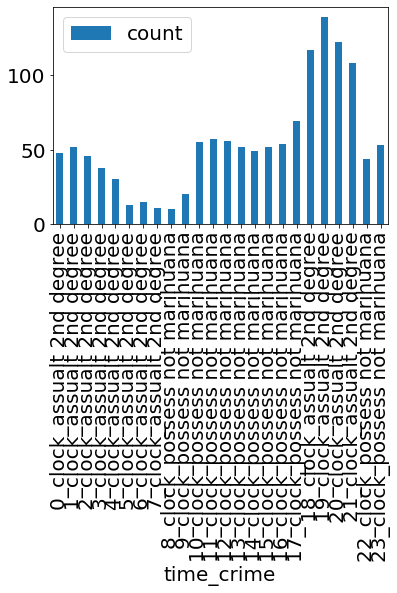

In [740]:
hist_df = pd.DataFrame(hist_dic.items(), columns=['time_crime', 'count'])
hist_df.plot(x="time_crime", y='count', kind="bar")